# Regressão linear múltipla e análises

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

import seaborn as sns

import scipy.stats as ss

In [9]:
dados = pd.read_csv("~/Desktop/Jupyter Programs/Dados/dados_regressao.csv", sep=',', encoding='utf-8')
print(dados.head(5))

          X1         X2           Y
0  54.967142  27.881202  103.711064
1  48.617357  27.732929   87.942216
2  56.476885  21.021784  122.608039
3  65.230299  28.349549  139.875142
4  47.658466  33.664145   85.224536


In [10]:
#Dados para Boxplot e verificação de Outliers
Y = dados['Y']

data_series = pd.Series(Y)
Q1 = data_series.quantile(0.25)
Q3 = data_series.quantile(0.75)

#Interquartile
IQR = Q3 - Q1

#Limites
sup = Q3 + (1.5 * IQR)
inf = Q1 - (1.5 * IQR)

print(f'Limite superior: {sup}\nLimite inferior: {inf}') 

Limite superior: 178.43780440687345
Limite inferior: 1.8855755954881488


(4961, 3)


<Axes: ylabel='Y'>

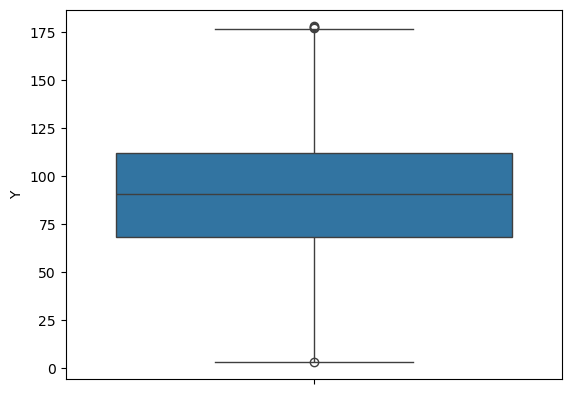

In [11]:
#Fazer a remoção de dados com valores superiores ao sup e inferiores ao inf

dados = dados[(dados['Y'] >= inf ) & (dados['Y'] <= sup)]
print(dados.shape)

sns.boxplot(dados['Y'])

In [12]:
#Separação de dados em treino e teste para validação cruzada.
X = np.array([dados['X1'], dados['X2']])
X = np.transpose(X)
Y = dados['Y']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [14]:
#Criando os modelos de regressão.

#1) Modelo de regressão linear múltipla.

modelo_linear = LinearRegression()
modelo_linear.fit(X_train, Y_train)

al = modelo_linear.coef_
bl = modelo_linear.intercept_

#2) Modelo de regressão Ridge.

modelo_ridge = Ridge(alpha=10)
modelo_ridge.fit(X_train, Y_train)

ar = modelo_ridge.coef_
br = modelo_ridge.intercept_

print(f'Coeficientes lineares: {al} e {bl}\nCoeficientes Ridge: {ar} e {br}')

Coeficientes lineares: [ 2.99288637 -1.97150721] e -0.3182326383738996
Coeficientes Ridge: [ 2.99279003 -1.97127569] e -0.32034901955263706


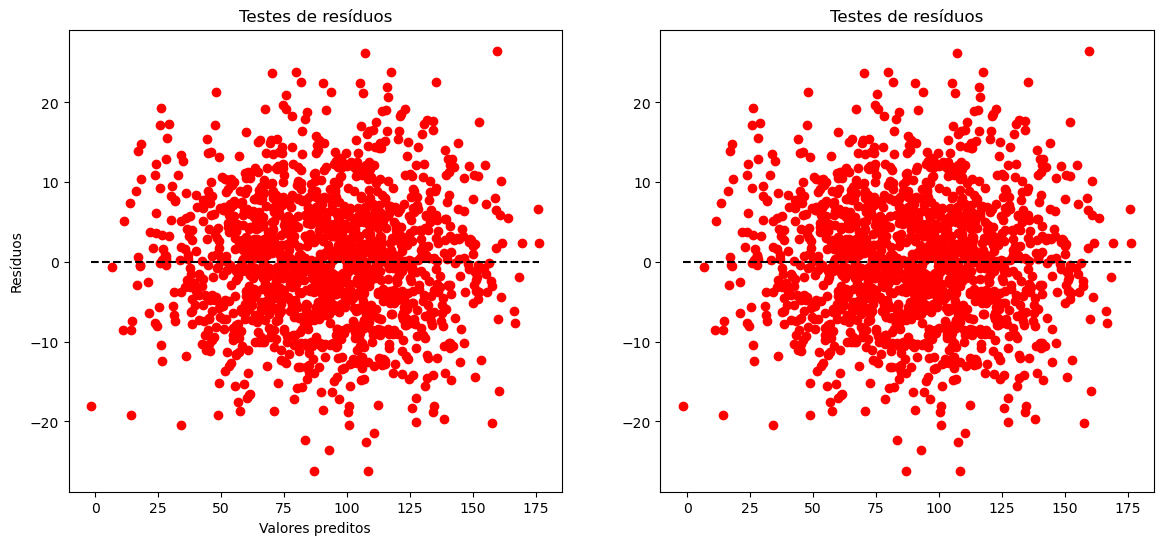

In [15]:
#Previsões e testes de resíduos. Aqui faço uma análise para ver se os resíduos são 
#distribuidos aleatoriamente (Homocedasticidade)

pred_linear = modelo_linear.predict(X_test)
pred_ridge = modelo_ridge.predict(X_test)

residuo_linear = pred_linear - Y_test
residuo_ridge = pred_ridge - Y_test

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 6))

ax1.set_title('Testes de resíduos')
ax1.set_xlabel('Valores preditos')
ax1.set_ylabel('Resíduos')
ax1.hlines(y = 0, xmax=max(pred_linear), xmin=min(pred_linear), color = 'black', linestyles = '--')
ax1.scatter(pred_linear, residuo_linear, color = 'red')

ax2.set_title('Testes de resíduos')
ax2.hlines(y = 0, xmax=max(pred_ridge), xmin=min(pred_ridge), color = 'black', linestyles='--')
ax2.scatter(pred_ridge, residuo_ridge, color = 'red')

Text(0.5, 1.0, 'Análise da normalidade dos erros')

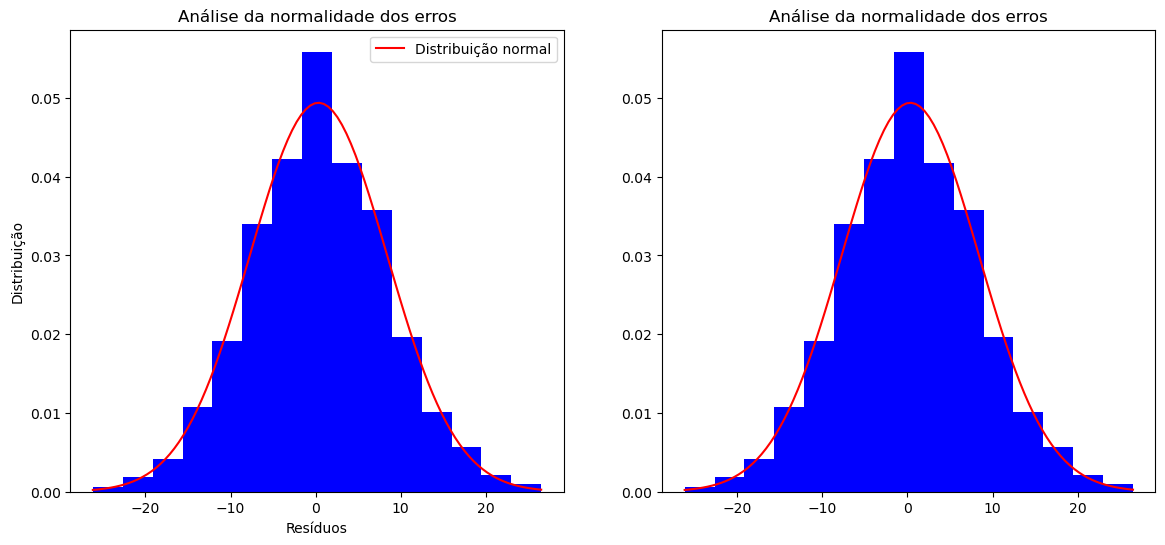

In [16]:
#Plotando uma distribuição em histograma dos erros.
#O objetivo aqui é ver se a distribuição de erros é normal.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 6))

pesos = np.ones(len(residuo_linear)) / len(residuo_linear) * 100

medial, stdl = ss.norm.fit(residuo_linear)
mediar, stdr = ss.norm.fit(residuo_ridge)

#Criando o plot de normalidade

x = np.linspace(min(residuo_linear), max(residuo_linear), 100)

normal_linear = ss.norm.pdf(x, medial, stdl)
normal_ridge = ss.norm.pdf(x, mediar, stdr)

ax1.set_title('Análise da normalidade dos erros')
ax1.hist(residuo_linear, bins = 15, color='blue', weights=pesos, density=True)
ax1.plot(x, normal_linear, color = 'red', label = 'Distribuição normal')
ax1.set_xlabel('Resíduos')
ax1.set_ylabel('Distribuição')
ax1.legend()

ax2.hist(residuo_ridge, bins = 15, color = 'blue', weights=pesos, density = True)
ax2.plot(x, normal_ridge, color = 'red')
ax2.set_title('Análise da normalidade dos erros')

In [17]:
#Testes: R² e RMSE para os modelos
#Além disso, usei a relação aproximada: RMSE² = STD² + Vies² para ver o Viés.

r2_linear = r2_score(Y_test, pred_linear)
rmse_linear = root_mean_squared_error(Y_test, pred_linear)

r2_ridge = r2_score(Y_test, pred_ridge)
rmse_ridge = root_mean_squared_error(Y_test, pred_ridge)

std_erro_linear = np.std(residuo_linear) 
std_erro_ridge = np.std(residuo_ridge)

vies_linear = np.sqrt([rmse_linear**2 - std_erro_linear**2])
vies_ridge = np.sqrt([rmse_linear**2 - std_erro_ridge**2])

print(f'R² linear: {r2_linear}\nRMSE linear: {rmse_linear}\nR² ridge: {r2_ridge}\nRMSE ridge: {rmse_ridge}')
print(f'Desvio padrão do erro linear: {std_erro_linear}\nDesvio padrão do erro ridge: {std_erro_ridge}')
print(f'Viés linear: {vies_linear}\nViés ridge: {vies_ridge}')

R² linear: 0.9378333832589119
RMSE linear: 8.085516781966883
R² ridge: 0.9378323762885703
RMSE ridge: 8.085582266008414
Desvio padrão do erro linear: 8.078719767190128
Desvio padrão do erro ridge: 8.078785334091119
Viés linear: [0.33146426]
Viés ridge: [0.32986233]
